# Firli Ilhami

## Content Based Filtering Algorithm
## Objective
Content Based Filtering is one of algorithm which has been used for recommendation system. Content Based Filtering will gives us recommendation based on our 'data'. For example, if we take the case is recommendation movie. This algorithm will recommends us film based on films that we have watched and doesn't care about other viewer's rating/opinion.
## Import Library and Dataset

In [453]:
import numpy as numpy
import pandas as pd
from recommendation_data import dataset

In [454]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [455]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

## Dataset
In this case, we will use 2 datasets, the first one is dataset about Films and their Description. The description is consist of 4 word:
1. First word  : Director
2. Second word : Actress
3. Third word  : Genre
4. Last word   : Country

In [456]:
df=pd.read_csv('dataset1.csv',delimiter=';')
df.head()

,Film,Description
0,Ada Apa dengan Cinta 2,Budi Tom Romance ID
1,Aladdin,Budi Cruise Romance US
2,Avengers: End Game,Andi Michael Action US
3,Bumi Manusia,Charles Tom Drama ID
4,Captain Marvel,Andi Cruise Action US


The second dataset is rating viewer about films. There are 10 films :

1. Ada Apa Dengan Cinta 2
2. Aladdin
3. Avenger: End Game
4. Bumi Manusia
5. Captain Marvel
6. Dilam 1991
7. Dua Garis Biru
8. Gundala
9. Spiderman: Far From Home
10. The Lion King

The rating score is from 1 to 5. If viewers give 0 score, it means they haven't watched that film and there are 24 respondens.

Our dataset is not dataframe, so i will make a dataframe to make it easier to see the data.

In [457]:
df1=pd.DataFrame(dataset)
df1.head()

,ANI,AhokTemanFirli,Damar Teman Firli,Dpv,Febi ganteng gak ada obat,Genjeh,Hania,Indra 1991 SM,Indra Junior,Jawaharal,...,Putrisqiana,Rima,Romantika,Star,Topik Zulkarnain,bunga,faizah,franadek,jul,luck
Ada Apa dengan Cinta 2,4,0,5,5,4,5,3,0,4,2,...,4,5,5,4,0,0,3,4,0,3
Aladdin,4,0,0,0,5,5,0,0,5,5,...,0,5,0,5,0,5,0,5,3,0
Avengers: End Game,0,3,5,5,5,5,0,0,5,5,...,5,5,0,5,5,5,5,5,3,4
Bumi Manusia,5,0,0,0,0,0,4,0,0,0,...,4,4,0,0,0,0,5,5,0,0
Captain Marvel,4,4,0,5,4,4,0,0,5,4,...,3,5,0,5,2,5,0,4,3,2


## Content_Based Function
This function will give us recommendation film which we haven't watched and based on film that we have watched before.
measuring similarity between films we will use linear_kernel metric and TfidVectorizer. The result score is from 0 to 1, if score is close to 1 it means that film has similarity with film which we have watched.<br>

We have to input 2 parameters:
1. person : Name of person
2. min_content_score : this is cut off for our result score, if our result score is below than min_content_score this function will not recommend that film. the value is from 0 to 1

In [468]:
def content_based(person,min_content_score):
    #Figure Properties
    plt.figure(figsize=(8,8))
    plt.title("Cosine_Similarities between film which %s haven't watched and other films" %(person) )
    plt.xlabel('Film not watched')
    
    
    #We want to know films that the person has watched and hasn't watched
    k=0
    not_watch=[]
    watch=[]
    for ratings in df1[person]:
        if ratings==0:                    #if ratings = 0 , it means he hasn't watched that film
            not_watch.append(df1.index[k])
            k=k+1
        else:
            watch.append(df1.index[k])
            k=k+1
    
    #We will analyze the description every films by linear_kernel and TfidfVectorizer
    #TfidfVectorizer will analyze how many same word in description film with another film's description
    #In this part we will calculate cosine_similarities 
    tf = TfidfVectorizer(analyzer='word',
                             ngram_range=(1, 3),
                             min_df=0,
                             stop_words='english')
    tfidf_matrix=tf.fit_transform(df['Description'])
    cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
    
    #Make a dataframe from cosine_similarities
    list_film=pd.DataFrame(cosine_similarities,index=df['Film'],columns=df['Film'])
    
    #Select list_film which we haven't watched and the final score is more than min_content_score
    #The final score film is mean of cosine_simalirites that film
    final=pd.DataFrame(list_film.loc[watch,not_watch].mean().sort_values(ascending=False),columns=['Score'])
    final=final[final.Score>=min_content_score]
    
    
    return print ('Recommendation Film :'),print(final), print('\n'),sns.heatmap(list_film.loc[watch,not_watch],annot=True,cmap='rainbow')

Recommendation Film :
                 Score
Film                  
Dilan 1991    0.204236
Bumi Manusia  0.195649




(None, None, None, <matplotlib.axes._subplots.AxesSubplot at 0x19e59b680f0>)

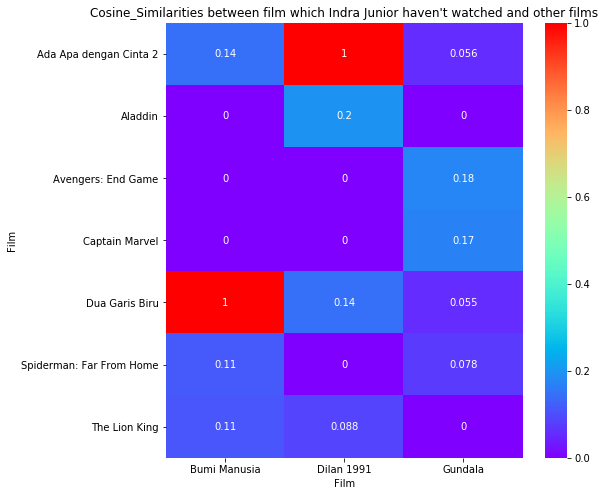

In [470]:
content_based('Indra Junior',0.11)

## Conclusion

We can see that there are 3 films which Indra Junior has not watched. There are Bumi Manusia, Dilan 1991 and Gundala. <br>
But our content_based funtion give him recommendation film only Dilan 1991 and Bumi Manusia. It because Gundala's score is below than min_content_score or below than 0.11

I have said before, if the score is close to 1 it means that film has similarity about genre, director, actress and country but in my opinion this result score is small (below 0.5). It means Bumi Dilan 1991 and Bumi Manusia is not good recommendation based on films that Indra Junior has watched.